<a href="https://colab.research.google.com/github/srfslvr14/Math-152/blob/main/Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract
The concept of prime numbers comes with a series of unanswered questions. In the following paper, we will implement a variety of visualization tool to clarify some of these questions in hopes of better understanding the list of prime numbers. We gather information from the prime numbers by generating several different sized lists of primes ranging from ten thousand to one million to cover and gather as much information as possible. Then we use these lists to generate visuals that help us analyze large amounts of data in a short amount of time. The primary tools used to generate the visuals are functions we created in Python along with MatPlotLib and PIL. Ultimately, with the information we gathered, we were able to answer some of the questions that come along with the concept of primes numbers.

#Work and Analysis


#Introduction
A prime number is a natural number that is divisible by only itself and 1. When analyzing a large list of prime numbers, several questions arise as to how they are related to one another. Often times, it appears as though the primes generated between two numbers are random. This paper will attempt to understand and analyze the relationship, if any, of large quantities of prime numbers. The main questions we will seek to answer are:


1)   **How many primes are there in a typical interval from 1 to a large number x?**

2)   **How many primes are there between two large numbers x and y?**

3)   **Which gaps are most common between consecutive prime numbers?**

4)   **How does the last digit of prime numbers behave?**

5)   **What is the error of the of the approximation of the prime number theorem?**

6)   **How do the last digits of the 'red primes' and 'blue primes' from our notebook behave?**

Since there are an infinte amount of prime numbers, as proven by Euclid, we will be using python programming tools such as MatPlotLib and PIL to aid us in gathering information on large amounts of prime numbers. To begin answering our questions, we used the "is_prime" and "where" functions from our notebooks to create a foundations with which we could build upon. With modifications to the two previously discussed functions, we are able to generate visualizations that we can then study and analyze to find a relationship between the large amount of prime numbers.




## Setting up the Exploration Environment

###Helper Functions

In [ ]:
#Load the necessary libraries
import mpmath
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
#To locate primes
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags

In [ ]:
#To extract primes
def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]


In [ ]:
#Extracts primes
def prime_list(n):
  plist=isprime_list(n)
  prime=where(plist)
  return prime

In [ ]:
#Creates a list of gaps between k and k-1 primes
def gap(L):
  gap=[]
  for k in range(0, len(L)):
    if k >= 1:
      gap.append(L[k]-L[k-1])
  return gap

In [ ]:
#Extracts the last digit of base 10 numbers
def last_digit(L):
  lastdigit=[]
  for k in range(0, len(L)):
    lastdigit.append(L[k]%10)
  return lastdigit

In [ ]:
#Compute absolute error of loginverse approximation
def error_abs(n): #Axel modified this
  a=prime_list(n)
  return abs(mpmath.li(n)-len(a))

In [ ]:
def error_rel(n): #Axel modified this
  a = prime_list(n)
  return abs(mpmath.li(n)-len(a))/abs(len(a))

In [ ]:
def following_digits(a,b,c):
  count = 0 #initialize count
  for i in range(len(c)): #go through the whole list
    if i >= 1:
      if c[i] == a and c[i-1] == b: #if desired sequence found
        count += 1 #count
  return count #return count

In [ ]:
def redprimes(l): #number of red primes
  return [p for p in l if p % 4 == 1] # List comprehension recovers red primes

In [ ]:
def blueprimes(l): #number of red primes
  return [p for p in l if p % 4 == 3] # List comprehension recovers blue primes

###Initalizing Lists

This code does a lot of computations to initialize very large data lists for later use, so it may take up to 4 or 5 minutes to finish initializing all the various lists.

In [ ]:
# First compute the number of primes between 1 and large X, for many large X
# Define large X as any number greater than 10,000, grow by 10,000 size intervals
# Second, compute the number of primes between two large numbers X and Y
# Third compute relative errors for log inverse
X = 0
Y = 10000
onetoX_totals = []  # list that contains total number of primes from 1 to X
XtoY_totals = []    # list that contains total number of primes from X to Y
relerrors = []      # list that contains rel erros of loginverse from 1 to X
Xlist = []
Ylist = []
for i in range(100):
  X = X + 10000
  Y = Y + X           # to ensure gap grows
  number_gap = Y - X  # always positive
  Xlist.append(X)
  Ylist.append(Y)
  onetoX_totals.append(len(prime_list(X)))        # append one to X totals
  XtoY_totals.append(len(prime_list(number_gap))) # append X to Y totals
  relerrors.append(abs(mpmath.li(X) - onetoX_totals[i]) / abs(onetoX_totals[i])) # append rel error of loginverse

## 1: How many primes are there in a typical interval from 1 to a large number x?




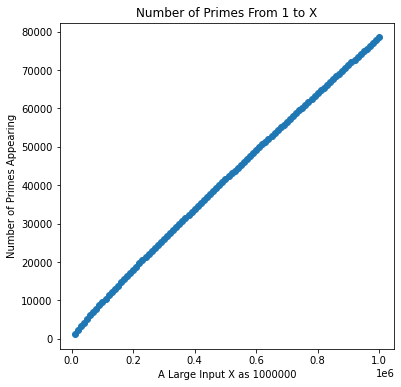

In [ ]:
# Show number of primes from 1 to X
plt.figure(figsize=(6,6))
plt.scatter(Xlist, onetoX_totals)
plt.xlabel(("A Large Input X as {}").format(X))
plt.ylabel("Number of Primes Appearing")
plt.title("Number of Primes From 1 to X")
plt.show()

**Analysis:**  The above scatter plot displays the counted amount of prime numbers which have a value equal to or less than X. As we are working with large values of X, our bounds are shown to easily enter the thousands, as X approaches 1,000,000, and the number of primes appearing between 1 and X approach 80,000. The scatter plot is almost perfectly linear, as the relationship between X and the number of primes between 1 and X are positivly related, and as one increases, the other can be expected to increase. 

##2: How many primes are there between two large numbers x and y?


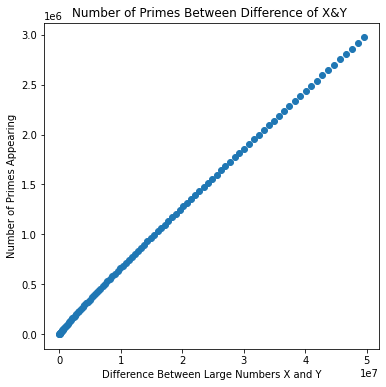

In [ ]:
# Show number of primes from X to Y
XYdiff = []
for i in range(0,100):
  XYdiff.append( Ylist[i] - Xlist[i] )

plt.figure(figsize=(6,6))
plt.scatter(XYdiff, XtoY_totals)
plt.xlabel(("Difference Between Large Numbers X and Y").format(X))
plt.ylabel("Number of Primes Appearing")
plt.title(("Number of Primes Between Difference of X&Y "))
plt.show()

**Analysis:** Here we see a similar scatter plot as explored in Question 1, though our bounds are different. The above scatter plot displays the relationship between the difference between two large values X and Y, and how many primes appear between these two values. 

For example, if X = 10,000 and Y = 11,000, then our x-axis will display 1000, and the y-axis will show the number of primes appearing which meet the conditions 10,000 < *p* < 11,000, where *p* is a prime.

The relationship between the difference between X&Y and the number of primes appearing is positive. As when the difference between X and Y increases, the number of prime numbers between the two values is expected to increase to follow. This makes sense as we explore and consider the relationship shown from Question 1, where the number of primes between 1 and a large number X increased as X increased.

##3: Which gaps are most common between consecutive prime numbers?

In [ ]:
#From the above grab the largest X and find the primes between 1 and X
#Observe the consecutive gaps and the last digits
largest_X_primes = prime_list(X)
largest_X_gaps = gap(largest_X_primes)
largest_X_digits = last_digit(largest_X_primes)

Frequency of Gaps between Consecutive Primes from One to 1,000,000


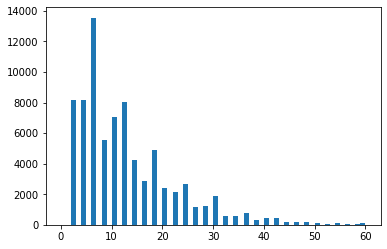

In [ ]:
#Observe the behavior of the gaps via histogram
plt.hist(largest_X_gaps, bins=np.linspace(0,60,61)) # Divide the range of numbers into 10 "bins".
plt.title(print("Frequency of Gaps between Consecutive Primes from One to {:,}".format(X)))
plt.show()

**Analysis:**
From the image above, we can see that from 1 to a large number such as 230,000, the gaps between the prime numbers vary from 1 to as high as 59. Though from the graph, we can see that a majority of the gaps remain less than 10.

##4: How does the last digit of the prime numbers behave?

Frequency of Last Digits of Primes from One to 1,000,000


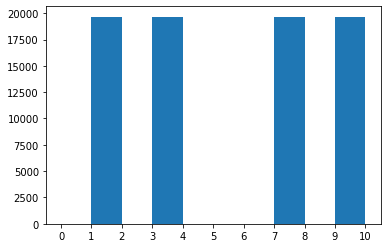

In [ ]:
#Observe the behavior of the last digits via histogram
plt.hist(largest_X_digits, bins=np.linspace(0,10,11)) # Divide the range of numbers into 10 "bins"
plt.xticks(np.linspace(0,10,11))
plt.title(print("Frequency of Last Digits of Primes from One to {:,}".format(X)))
plt.show()

**Anaysis:** The graph above depicts the frequency of the last digits of primes from 1 to 230,000. It is known that all prime numbers, except for 2 and 5, must have their last digit 1,3,7, or 9, which is why we only measure four quantities. The quantities of each last digit remains consistent even as we reach high values such as 230,000.

We further elaborate on the bahvior of the last digits in question 6.

##5: What is the error of the of the approximation of the prime number theorem?

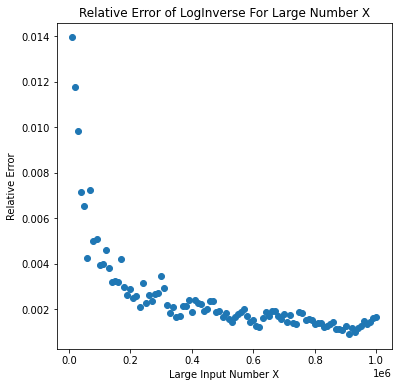

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Xlist, relerrors)
plt.xlabel("Large Input Number X")
plt.ylabel("Relative Error")
plt.title("Relative Error of LogInverse For Large Number X")
plt.show()

**Analysis:** The above scatter plot displays the relationship between a large value X and the resulting relative error shown when using in the *Li(X)* (logarithmic integral function) to determine the amount of primes between 1 and X. As shown, as we increase the size of the large X value towards 1e6, the relative error begins to approach 0. Thus, we can conclude that the larger input X we use for *Li(X)*, the less relative error will occur, as more data is collected. So, to answer our question by using our scatter plot, the error of the approximation of the prime number theorm is approaching 0 as X increases.

##6: How do the last digits of the 'red primes' and 'blue primes' from our notebook behave?

In [ ]:
#analyze red and blue primes
reds_largestX = redprimes(largest_X_primes)
blues_largestX = blueprimes(largest_X_primes)
digits_red = last_digit(reds_largestX)
digits_blue = last_digit(blues_largestX)

Frequency of Last Digits of Red Primes from One to 1,000,000


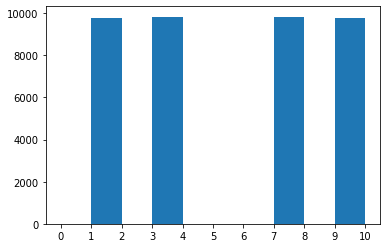

In [ ]:
plt.hist(digits_red, bins=np.linspace(0,10,11)) # Divide the range of numbers into 10 "bins"
plt.xticks(np.linspace(0,10,11))
plt.title(print("Frequency of Last Digits of Red Primes from One to {:,}".format(X)))
plt.show()

Frequency of Last Digits of Blue Primes from One to 1,000,000


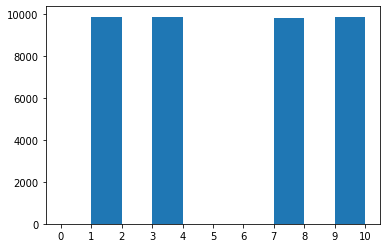

In [ ]:
plt.hist(digits_blue, bins=np.linspace(0,10,11)) # Divide the range of numbers into 10 "bins"
plt.xticks(np.linspace(0,10,11))
plt.title(print("Frequency of Last Digits of Blue Primes from One to {:,}".format(X)))
plt.show()

In [ ]:
#To test out the recent theory that the last digits of RED primes do not follow themselves as often as they follow other digits
digits = [1,3,7,9] #the only possible last digits of primes besides 2
f = 0
c = 0
for i in range(len(digits)):
  f = f + following_digits(digits[i],digits[i],digits_red)
  c += 1
print("Average frequency of a RED prime last digit following itself: {0:0.2f}".format(f/c))

f = 0
c = 0
for i in range(len(digits)):
  for j in range(len(digits)):
    if i != j:
      f = f + following_digits(digits[i],digits[j],digits_red)
      c += 1
print("Average frequency of a RED prime last digit not following itself: {0:0.2f}".format(f/c))

Average frequency of a RED prime last digit following itself: 1465.25
Average frequency of a RED prime last digit not following itself: 2776.00


In [ ]:
#To test out the recent theory that the last digits of BLUE primes do not follow themselves as often as they follow other digits
digits = [1,3,7,9] #the only possible last digits of primes besides 2
f = 0
c = 0
for i in range(len(digits)):
  f = f + following_digits(digits[i],digits[i],digits_blue)
  c += 1
print("Average frequency of a BLUE prime last digit following itself: {0:0.2f}".format(f/c))

f = 0
c = 0
for i in range(len(digits)):
  for j in range(len(digits)):
    if i != j:
      f = f + following_digits(digits[i],digits[j],digits_blue)
      c += 1
print("Average frequency of a BLUE prime last digit not following itself: {0:0.2f}".format(f/c))

Average frequency of a BLUE prime last digit following itself: 1478.50
Average frequency of a BLUE prime last digit not following itself: 2783.92


##PIL Images

In this section we have a series of PIL images to display the various aspects and habits of prime numbers, now visualized as a 1000x1000 pixel image.

In [ ]:
X = 1000
X_primes = prime_list(X)
X_gaps = gap(X_primes)
X_gaps.append(0)
X_gaps.append(0)

### Various Kinds of Prime Numbers, and Their Frequncey 

Here we have a PIL image of all the primes less than 1000, colored green.

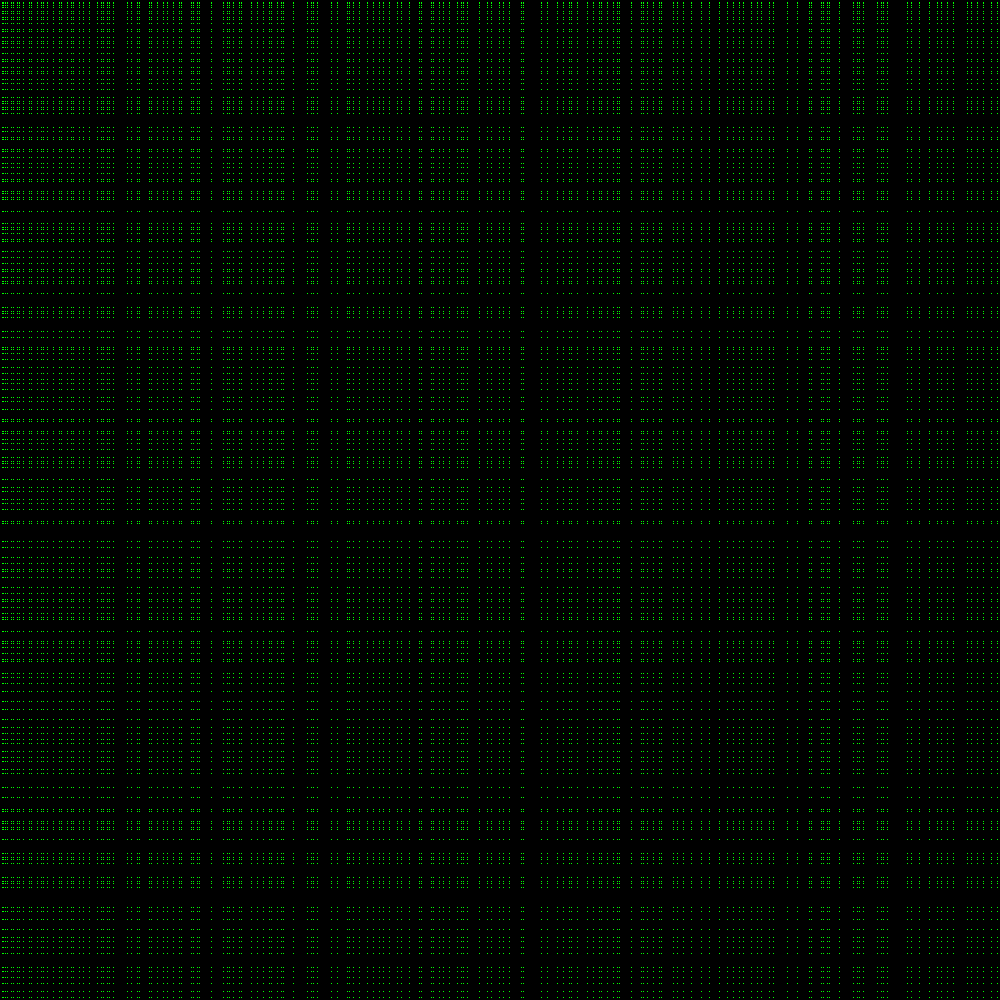

In [ ]:
#PIL image of all the primes, colored green
n = 1000
pil_primes = isprime_list(n)
array = np.zeros([n, n, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
for x in range(n):
  for y in range(n):
    if pil_primes[x] and pil_primes[y]:
      array[x, y] = [pil_primes[x],255, pil_primes[y]]
all_primes = Image.fromarray(array) # Create an image from the array.
display(all_primes) # Display the image in the notebook.

Here we have a PIL image of all "Red Primes," as defined in Notebook 2, which occur before 1000. Looking at this visual shows us a bit of information about when and why red primes occur.

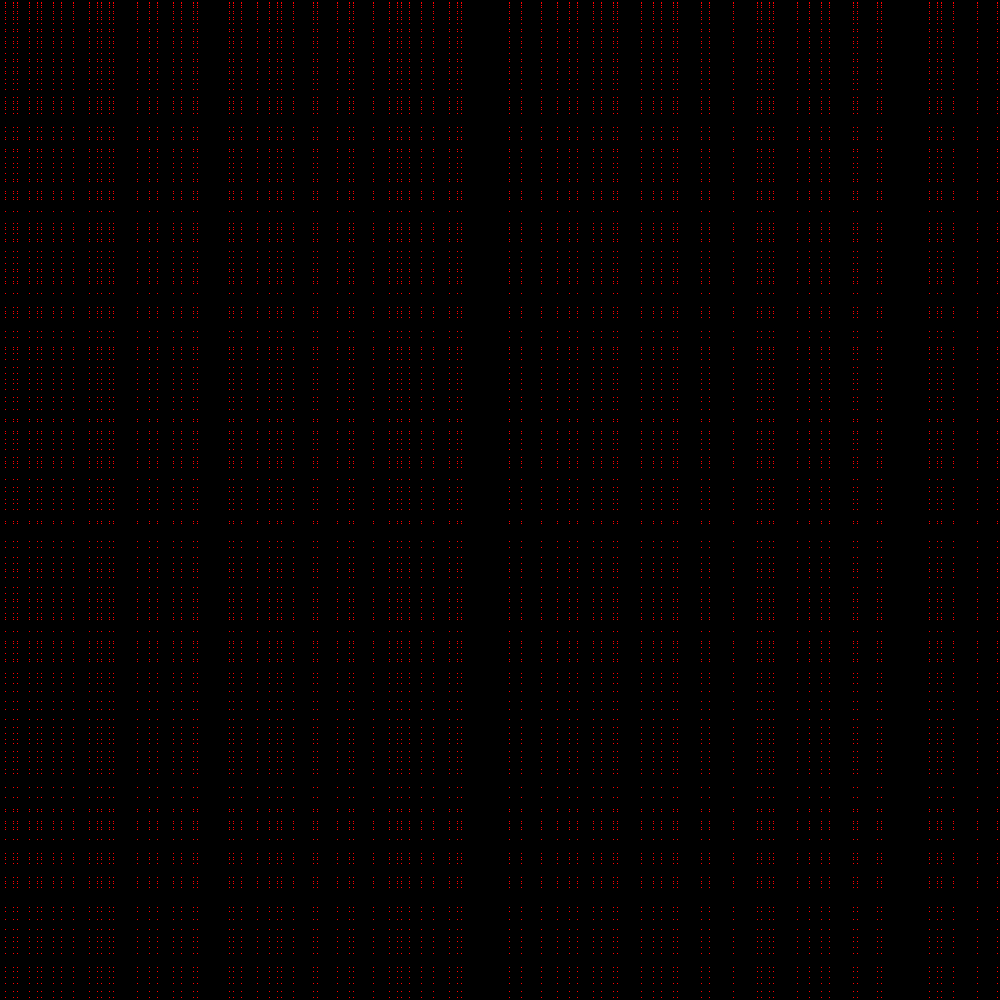

In [ ]:
#PIL image of only the red primes
n = 1000
pil_primes = isprime_list(n)
array = np.zeros([n, n, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
for x in range(n):
  for y in range(n):
    if pil_primes[x] and pil_primes[y]:
      if y % 4 == 1:
        array[x, y] = [255, pil_primes[x], pil_primes[y]]
      #elif y % 4 == 3:
        #array[x, y] = [pil_primes[x], pil_primes[y], 255]
reds = Image.fromarray(array) # Create an image from the array.
display(reds) # Display the image in the notebook.

Here we have a PIL image of all "Blue Primes," as defined in Notebook 2, which occur before 1000. Looking at this visual shows us a bit of information about when and why blue primes occur.

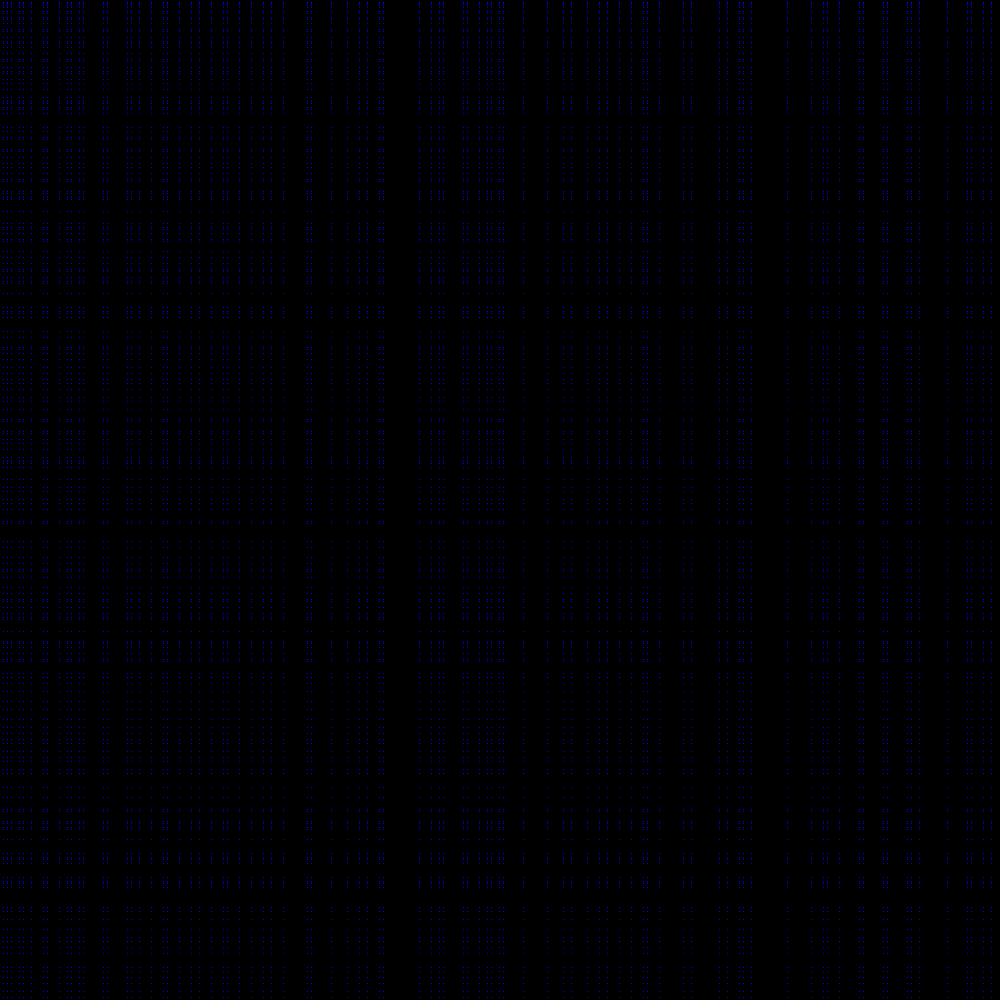

In [ ]:
#PIL image of only the blue primes
n = 1000
pil_primes = isprime_list(n)
array = np.zeros([n, n, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
for x in range(n):
  for y in range(n):
    if pil_primes[x] and pil_primes[y]:
      #if y % 4 == 1:
        #array[x, y] = [255, pil_primes[x], pil_primes[y]]
      if y % 4 == 3:
        array[x, y] = [pil_primes[x], pil_primes[y], 255]
blues = Image.fromarray(array) # Create an image from the array.
display(blues) # Display the image in the notebook.

Here we have a PIL image of both "Red Primes" and "Blue Primes," shown together, which occur before 1000. Looking at this visual shows us a bit of information about when and why Red primes occur compared to Blue primes, as well as how often a Red Prime and Blue Prime are shared, as displayed by pink pixels.

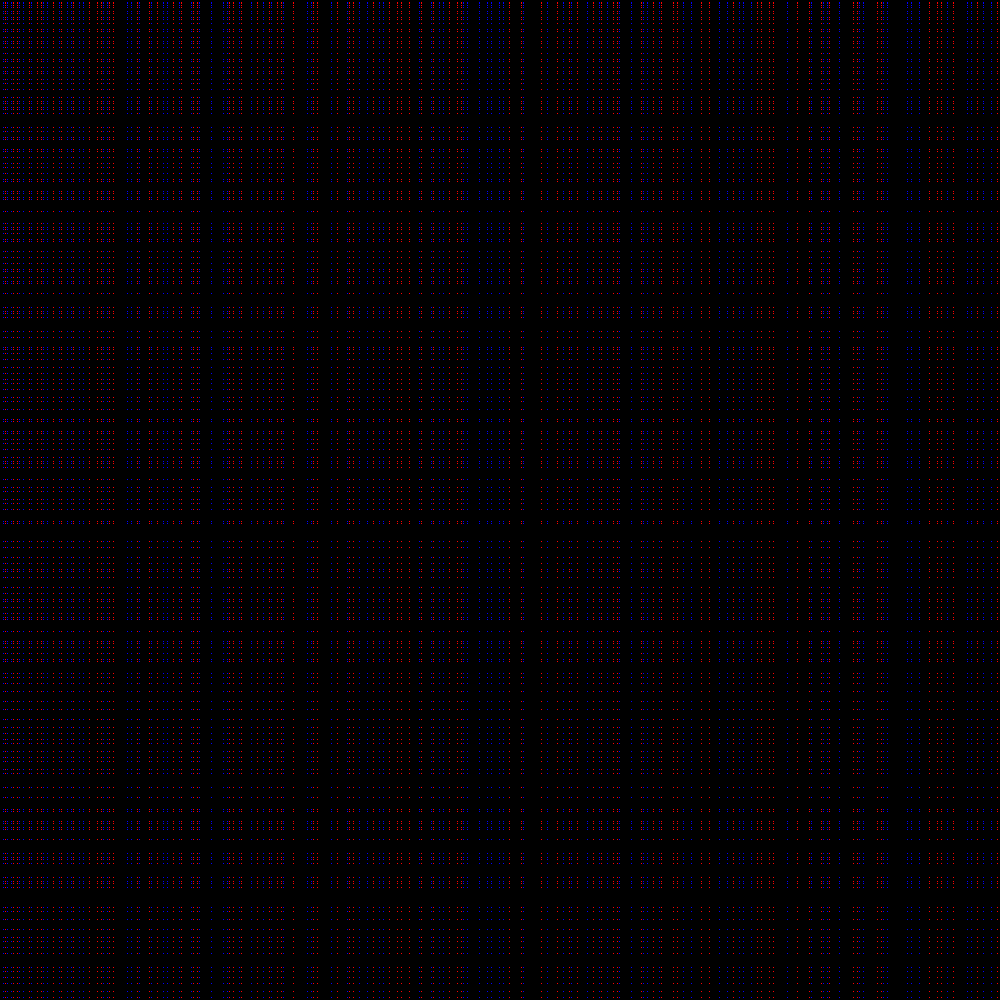

In [ ]:
#PIL image of all the primes split into red and blue primes indicated by respective color
n = 1000
pil_primes = isprime_list(n)
array = np.zeros([n, n, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
for x in range(n):
  for y in range(n):
    if pil_primes[x] and pil_primes[y]:
      if y % 4 == 1:
        array[x, y] = [255, pil_primes[x], pil_primes[y]]
      elif y % 4 == 3:
        array[x, y] = [pil_primes[x], pil_primes[y], 255]
red_blues = Image.fromarray(array) # Create an image from the array.
display(red_blues) # Display the image in the notebook.

### Last Digit of a Prime Number

Below displays a PIL imageshowcasing every prime number (less than 1000), the primes are split into different colored groups determined their last digit. 

For example, 
> "1" colored with green

> "3" colored with dark blue

> "5" being with dark red

> "7" being with blue
    
> "9" being with red


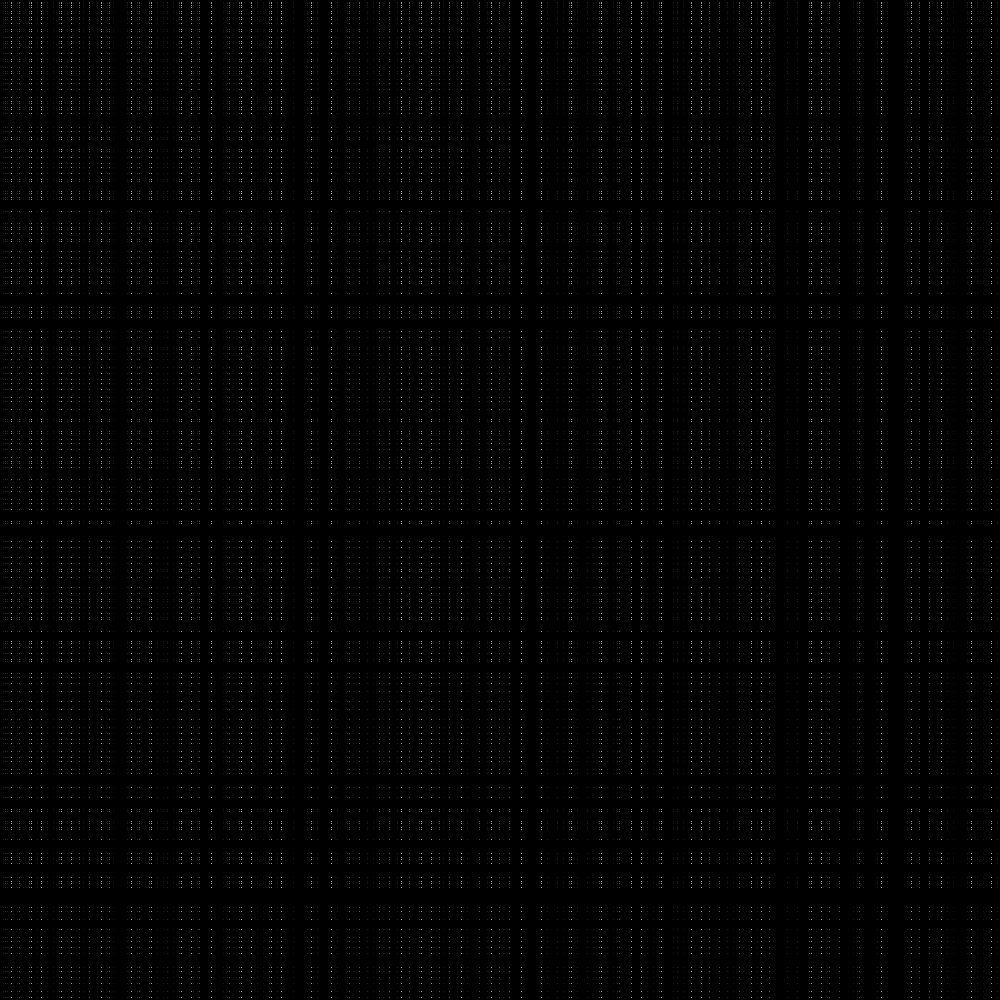

In [ ]:
#PIL image of all the primes split into groups by their last digits
n = 1000
pil_primes = isprime_list(n)
array = np.zeros([n, n, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
for x in range(n):
  for y in range(n):
    if pil_primes[x] and pil_primes[y]:
      if y % 10 == 1:
        array[x, y] = [pil_primes[x], 255, pil_primes[y]] #green
      elif y % 10 == 3:
        array[x, y] = [pil_primes[x], pil_primes[y], 150] #light blue
      elif y % 10 == 5:
        array[x, y] = [150, pil_primes[x], pil_primes[y]] #dark red
      elif y % 10 == 7:
        array[x, y] = [pil_primes[x], pil_primes[y], 255] #blue
      elif y % 10 == 9:
        array[x, y] = [255, pil_primes[x], pil_primes[y]] #red
prime_digits = Image.fromarray(array) # Create an image from the array.
display(prime_digits) # Display the image in the notebook.

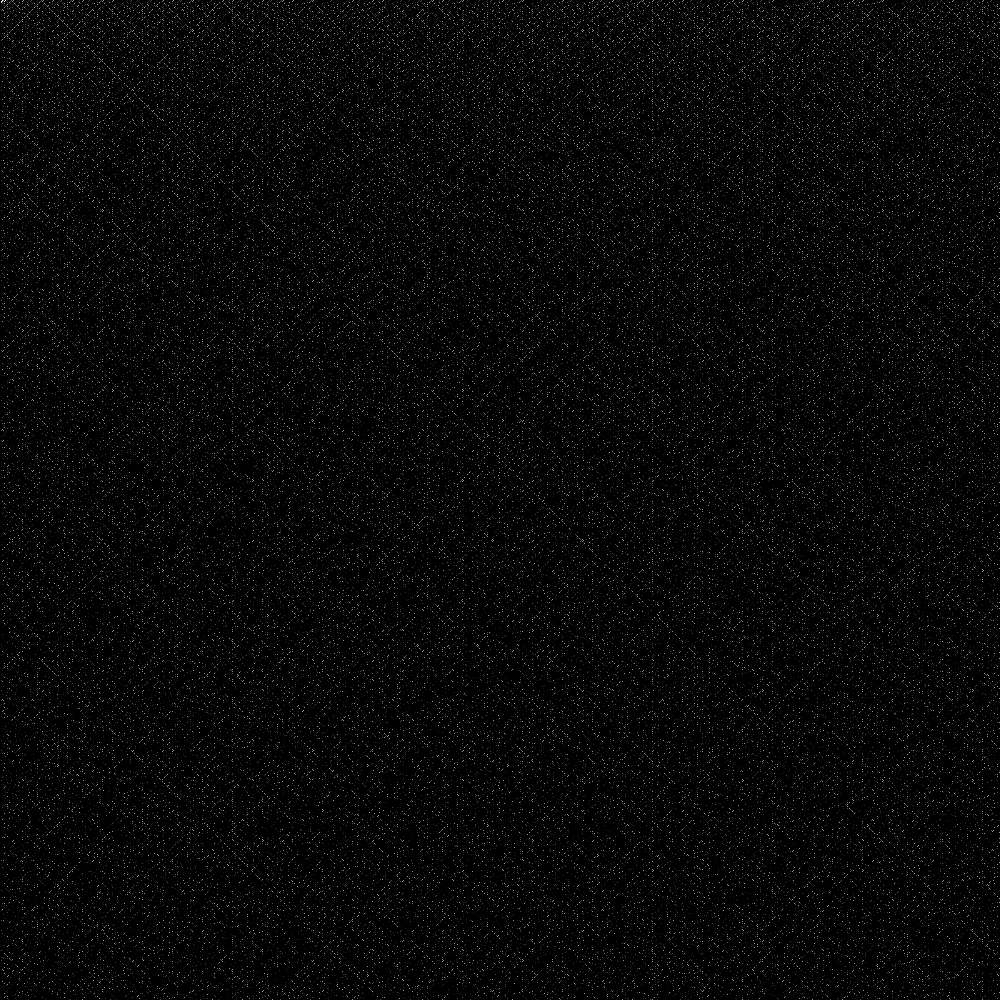

In [ ]:
pil_primes=isprime_list(1000000)
prime=where(pil_primes)
blue_prime=blueprimes(prime)
red_prime=redprimes(prime)
array = np.zeros([1000, 1000, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
check=0
for x in range(1000):
  for y in range(1000):
    prime_coordi=check*x+y # Locate each prime
    if pil_primes[check*x+y]:
      if prime_coordi%10==1: # Assign different colors for primes with each last digits
        array[x,y]=[255,0,0]
      elif prime_coordi%10==3:
        array[x,y]=[0,255,0]
      elif prime_coordi%10==7:
        array[x,y]=[0,0,255]
      elif prime_coordi%10==9:
        array[x,y]=[126,0,0]
      else:
        array[x,y]=[255,255,255]
  check+=1
img = Image.fromarray(array) # Create an image from the array.
display(img) # Display the image in the notebook.

To further display the image we created, here is the same image, but with only prime numbers ending in "1" being loaded.

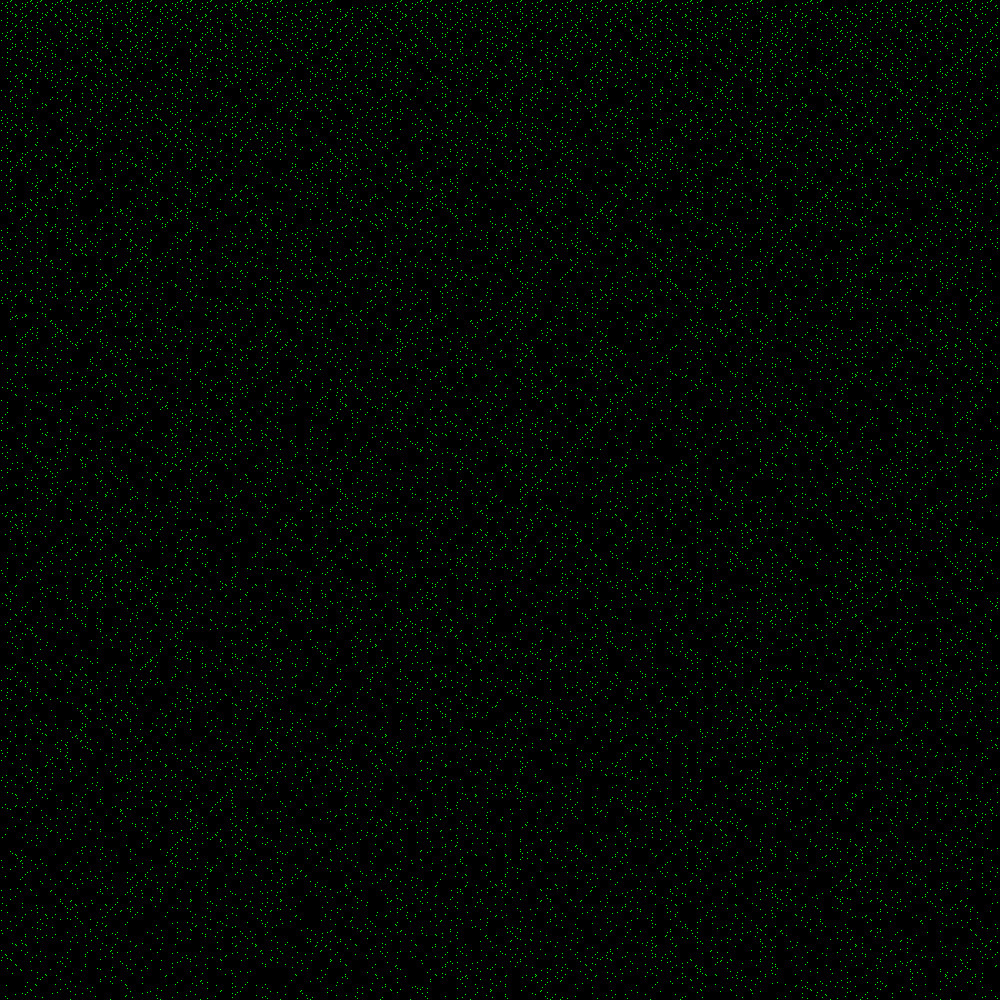

In [ ]:
pil_primes=isprime_list(1000000)
prime=where(pil_primes)
blue_prime=blueprimes(prime)
red_prime=redprimes(prime)
array = np.zeros([1000, 1000, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
check=0
for x in range(1000):
  for y in range(1000):
    prime_coordi=check*x+y # Locate each prime
    if pil_primes[check*x+y]:
      if prime_coordi%10==1: # Assign different colors for primes with each last digits
        array[x,y]=[0,255,0]
  check+=1
reds = Image.fromarray(array) # Create an image from the array.
display(reds) # Display the image in the notebook.

To further display the image we created, here is the same image, but with only prime numbers ending in "7" being loaded.

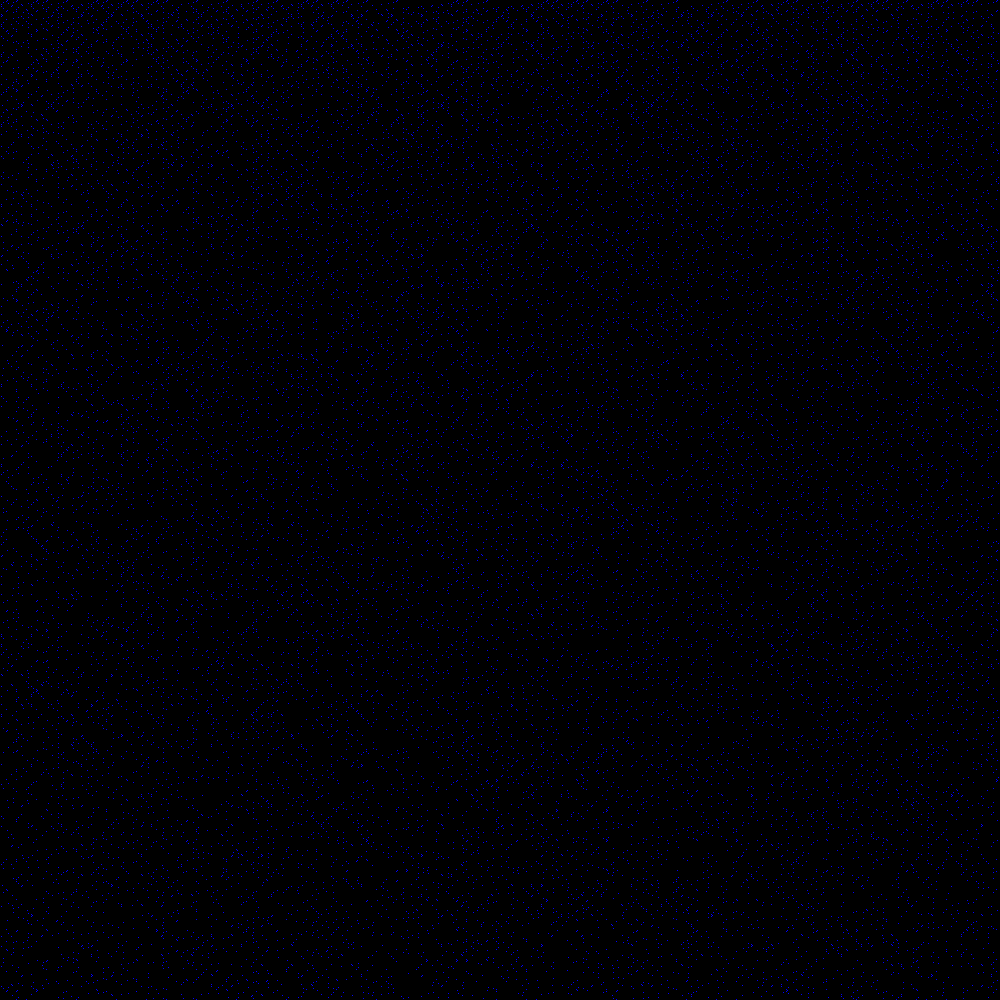

In [ ]:
pil_primes=isprime_list(1000000)
prime=where(pil_primes)
blue_prime=blueprimes(prime)
red_prime=redprimes(prime)
array = np.zeros([1000, 1000, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
check=0
for x in range(1000):
  for y in range(1000):
    prime_coordi=check*x+y # Locate each prime
    if pil_primes[check*x+y]:
      if prime_coordi%10==7:
       array[x,y]=[0,0,255]
  check+=1
greens = Image.fromarray(array) # Create an image from the array.
display(greens) # Display the image in the notebook.

By overlapping each indivisual prime coloring (based on the last digit) of all primes less than 1000^2, we can achieve the image before.

#Conclusion
Upon initial observation of a large list of prime numbers it may appear as though the numbers are being generated randomly. However, using Python programming tools such as MatPlotLib and PIL we were able to study the behavior of prime numbers and see that there are in-fact some relationships between them.

We first observed that the difference between two given numbers and the size of the list of primes between them is proportional. As the difference of the two numbers grows, so does the list of primes between them. Upon closer inspection, we also determined that there is a consistent pattern between the gaps of those prime numbers. We observed that the most common gaps between two consecutive prime numbers are generally less than 10 even as we created a larger list. Additionally, when analyzing the behavior of the last digit of these prime numbers we found that the frequency of the last digits 1,3,7, and 9 remain very consistent to one another. From the graphs above, there are no significant biases towards any specific last digit. To take a closer look at this data, we analyzed the “red primes” (primes modulo 1) and “blue prime” (primes modulo 3) from one of our previous notebooks. The data from the “red prime” and “blue primes” showed a very similar visual to that of all the primes. Lastly, we compared the results of the “Prime Number Theorem” and our own function to see how accurate the approximation from the “Prime Number Theorem” is. The “Prime Number Theorem” initially starts very accurate with an error as small as 0.014 and it approaches zero as the size of the list of primes increases.